<a href="https://colab.research.google.com/github/Criell/Data/blob/master/simple__perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Perceptron training algorithm



In [ ]:
class Perceptron:
    
    # input_size: dimension of the input including bias
    def __init__(self,input_size):
      
        # we store the input size because we will need it later
        self.input_size = input_size
        
        # weights (w) in randomly initalized to be the same size as the input
        self.w = np.random.randn(input_size,1).reshape(input_size,1)
        
        # we will store our accuracy after each iteration here
        self.history = []
        self.statistics = []
    
    def XW (self,X, i):
      
        activationsum = 0
        for j in range(self.input_size):
          activationsum = sum (activationsum + self.w[j] * X[i,j]) 
        return activationsum
      
    def weight (self, X, Y, prediction, i):
                        
        for j in range(self.input_size):           
          self.w[j] = self.w[j] + ((Y[i] - prediction) * X[i,j])
        
    def train(self,X,Y, max_epochs = 100):
        
        # we clear history each time we start training
        self.history = []
        
        converged = False
        epochs = 0
        
        while not converged and epochs < max_epochs :

            # TODO              
            # 1. add training code here that updates self.w 
            
            i = 0  #number of label
            
            while i!=Y.shape[0]:
        
              activation = self.XW(X, i)
              
              if activation < 0: 
                prediction = 0
              else:
                prediction = 1
              
              self.weight (X, Y, prediction, i)

              i=i+1
  
            # after training one epoch, we compute again the accuracy
            self.compute_train_accuracy(X,Y) 
            
            # 2.  a criteria to set converged to True under the correct circumstances. 
            j = len(self.history)-1
            
            if self.history[j] > cv:
              converged = True
            
            epochs +=1
            
        
        if epochs == max_epochs:
          print("Qutting: Reached max iterations")
          
        if converged:
          print("Qutting: Converged")
          
        self.plot_training_history()
        self.statistics.append([Y.shape[0], epochs, self.history[j]])

    
    # The draw function plots all the points and our current estimate 
    # of the boundary between the two classes. Point are colored according to
    # the current output of the classifier. Ground truth boundary is also
    # plotted since we know how we generated the data
    
    def draw(self,X):
      
        pl.close()
        out = np.matmul(X,self.w).squeeze()
        
        P = X[out >= 0,:] 
        N = X[out.T < 0,:]
        
        x = np.linspace(0,1)
        
        pl.xlim((0,1))
        pl.ylim((0,1))
 
        pl.plot(P[:,0],P[:,1],'go', label = 'Positive')
        pl.plot(N[:,0],N[:,1],'rx', label = 'Negative')
        pl.plot(x, x, label = 'GT')
        
        a = self.w[0]
        b = self.w[1]
        c = self.w[2]
        print (a,b,c)
        
        pl.plot(x, -a/b * x - c/b, label = 'Estimated')
        
        pl.axis('tight')
        pl.legend()
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1)
        
    
    # This computes the accuracy of our current estimate
    def compute_train_accuracy(self,X,Y):
        out = np.matmul(X,self.w)
        Y_bar = (out >= 0)
        accuracy = np.sum(Y==Y_bar)/np.float(Y_bar.shape[0])
        self.history.append(accuracy)
        print("Accuracy : %f " % (accuracy))
        self.draw(X)
        
    # Once training is done, we can plot the accuracy over time 
    def plot_training_history(self):
      plt.ylim((0,1.01))
      plt.plot(np.arange(len(self.history))+1, np.array(self.history),'-x')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.show()        
      

In [ ]:
import numpy as np # This is for mathematical operations

# this is used in plotting 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

cv = 0.9999
lrate = 0.01

%matplotlib inline

In [ ]:
def computeX(number_of_samples):

  X = np.random.rand(number_of_samples,2)
  X = np.append(X, np.ones((X.shape[0],1)),axis = 1)
  return X


def computeY(X, number_of_samples):
  
  Y = X[:,1] > (X[:,0])
  Y = np.float32(Y)
  Y = Y.reshape((number_of_samples,1))
  return Y


def epoch(p, number_of_samples):

  X = computeX(number_of_samples)
  Y = computeY(X,number_of_samples)
  p.train(X,Y)
  print ("Samples - Epochs - Accuracy: ", p.statistics)

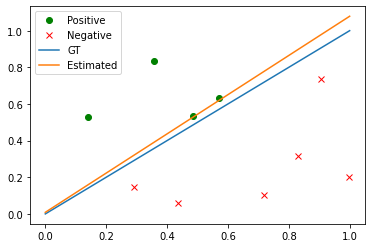

Qutting: Converged


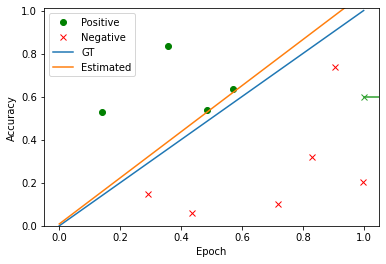

Samples - Epochs - Accuracy:  [[10, 37, 1.0]]


In [ ]:
p = Perceptron(3)
epoch(p, 10)

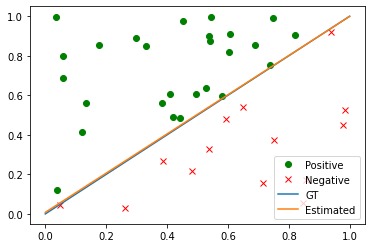

Qutting: Converged


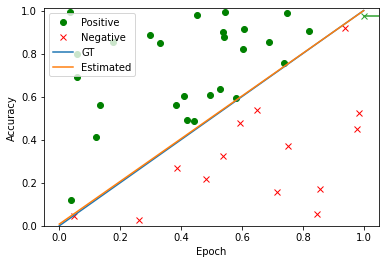

Samples - Epochs - Accuracy:  [[10, 37, 1.0], [40, 3, 1.0]]


In [ ]:
epoch(p, 40)

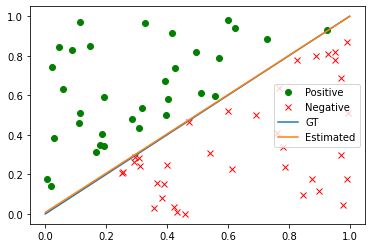

Qutting: Converged


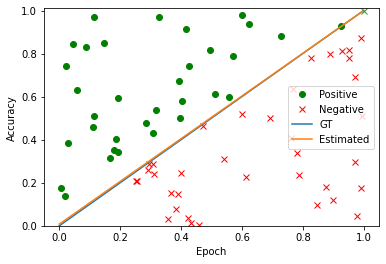

Samples - Epochs - Accuracy:  [[10, 37, 1.0], [40, 3, 1.0], [70, 1, 1.0]]


In [ ]:
epoch(p, 70)

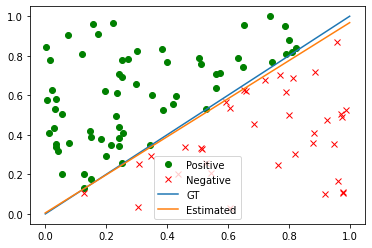

Qutting: Converged


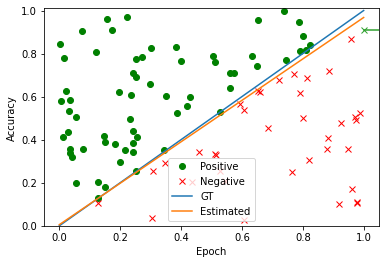

Samples - Epochs - Accuracy:  [[10, 37, 1.0], [40, 3, 1.0], [70, 1, 1.0], [100, 12, 1.0]]


In [ ]:
epoch(p, 100)

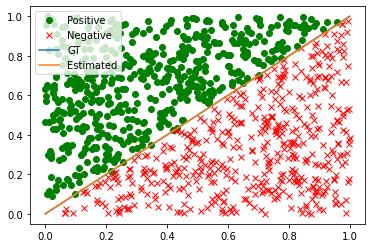

Qutting: Converged


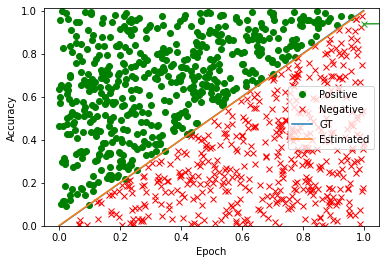

Samples - Epochs - Accuracy:  [[10, 37, 1.0], [40, 3, 1.0], [70, 1, 1.0], [100, 12, 1.0], [1000, 85, 1.0]]


In [ ]:
epoch(p, 1000)

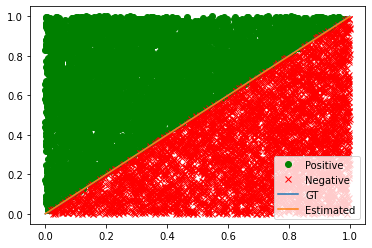

Qutting: Reached max iterations


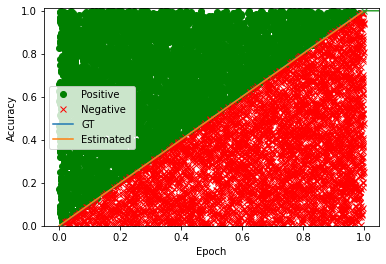

Samples - Epochs - Accuracy:  [[10, 37, 1.0], [40, 3, 1.0], [70, 1, 1.0], [100, 12, 1.0], [1000, 85, 1.0], [10000, 100, 0.9992]]


In [ ]:
epoch(p, 10000)

In [ ]:
for i in range (len(p.statistics)):
  print (p.statistics[i])

[10, 37, 1.0]
[40, 3, 1.0]
[70, 1, 1.0]
[100, 12, 1.0]
[1000, 85, 1.0]
[10000, 100, 0.9992]


In [ ]:
class Perceptronlr:
    
    # input_size: dimension of the input including bias
    def __init__(self,input_size):
      
        # we store the input size because we will need it later
        self.input_size = input_size
        
        # weights (w) in randomly initalized to be the same size as the input
        self.w = np.random.randn(input_size,1).reshape(input_size,1)
        self.learning_rate = lrate
        
        # we will store our accuracy after each iteration here
        self.history = []
        self.statistics = []
    
    def XW (self,X, i):
      
        activationsum = 0
        for j in range(self.input_size):
          activationsum = sum (activationsum + self.w[j] * X[i,j]) 
        return activationsum
      
    def weight (self, X, Y, prediction, i):
                        
        for j in range(self.input_size):           
          e = Y[i] - prediction
          lr = self.learning_rate * e * X[i,j]
          self.w[j] = self.w[j] + lr
              
    def train(self,X,Y, max_epochs = 100):
      
        # we clear history each time we start training
        self.history = []
        
        converged = False
        epochs = 0
        
        while not converged and epochs < max_epochs :

            # TODO              
            # 1. add training code here that updates self.w 
            
            i = 0  #number of label
            
            while i!=Y.shape[0]:
        
              activation = self.XW(X, i)
              
              if activation < 0: 
                prediction = 0
              else:
                prediction = 1
              
              self.weight (X, Y, prediction, i)

              i=i+1
  
            # after training one epoch, we compute again the accuracy
            self.compute_train_accuracy(X,Y) 
            
            # 2.  a criteria to set converged to True under the correct circumstances. 
            j = len(self.history)-1
            
            if self.history[j] > cv:
              converged = True
            
            epochs +=1
        
        if epochs == max_epochs:
          print("Qutting: Reached max iterations")
          
        if converged:
          print("Qutting: Converged")
          
        self.plot_training_history()
        self.statistics.append([Y.shape[0], epochs, self.history[j]])

    
    # The draw function plots all the points and our current estimate 
    # of the boundary between the two classes. Point are colored according to
    # the current output of the classifier. Ground truth boundary is also
    # plotted since we know how we generated the data
    
    def draw(self,X):
      
        pl.close()
        out = np.matmul(X,self.w).squeeze()
        
        P = X[out >= 0,:] 
        N = X[out.T < 0,:]
        
        x = np.linspace(0,1)
        
        pl.xlim((0,1))
        pl.ylim((0,1))
 
        pl.plot(P[:,0],P[:,1],'go', label = 'Positive')
        pl.plot(N[:,0],N[:,1],'rx', label = 'Negative')
        pl.plot(x, x, label = 'GT')
        
        a = self.w[0]
        b = self.w[1]
        c = self.w[2]
        print (a,b,c)
        
        pl.plot(x, -a/b * x - c/b, label = 'Estimated')
        
        pl.axis('tight')
        pl.legend()
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1)
        
    
    # This computes the accuracy of our current estimate
    def compute_train_accuracy(self,X,Y):
        out = np.matmul(X,self.w)
        Y_bar = (out >= 0)
        accuracy = np.sum(Y==Y_bar)/np.float(Y_bar.shape[0])
        self.history.append(accuracy)
        print("Accuracy : %f " % (accuracy))
        self.draw(X)
        
    # Once training is done, we can plot the accuracy over time 
    def plot_training_history(self):
      plt.ylim((0,1.01))
      plt.plot(np.arange(len(self.history))+1, np.array(self.history),'-x')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.show()   

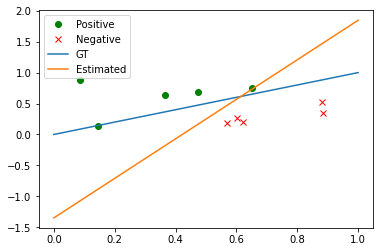

Qutting: Reached max iterations


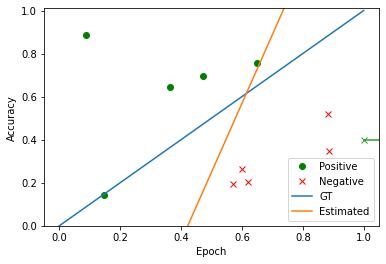

Samples - Epochs - Accuracy:  [[10, 100, 0.9]]


In [ ]:
plr = Perceptronlr(3)
epoch(plr, 10)

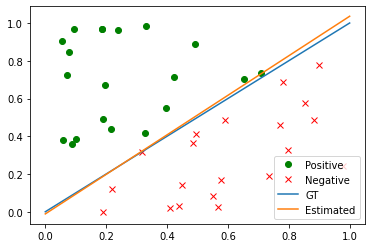

Qutting: Converged


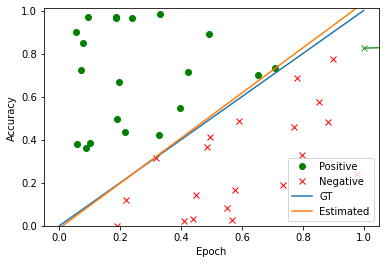

Samples - Epochs - Accuracy:  [[10, 100, 0.9], [40, 63, 1.0]]


In [ ]:
epoch(plr, 40)

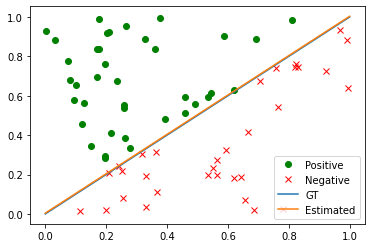

Qutting: Converged


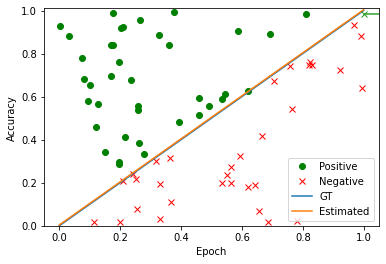

Samples - Epochs - Accuracy:  [[10, 100, 0.9], [40, 63, 1.0], [70, 5, 1.0]]


In [ ]:
epoch(plr, 70)

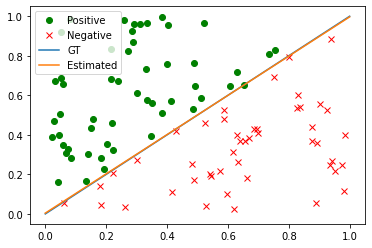

Qutting: Converged


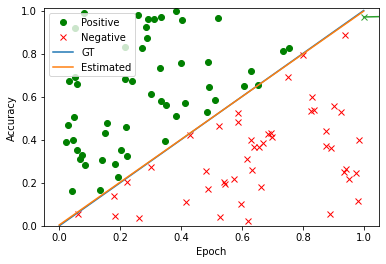

Samples - Epochs - Accuracy:  [[10, 100, 0.9], [40, 63, 1.0], [70, 5, 1.0], [100, 2, 1.0]]


In [ ]:
epoch(plr, 100)

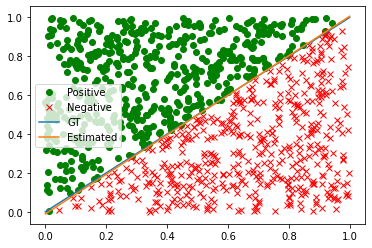

Qutting: Reached max iterations


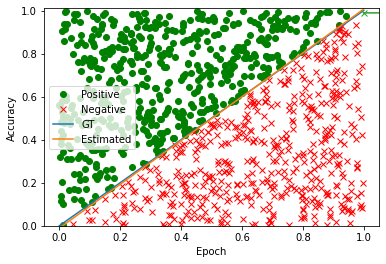

Samples - Epochs - Accuracy:  [[10, 100, 0.9], [40, 63, 1.0], [70, 5, 1.0], [100, 2, 1.0], [1000, 100, 0.997]]


In [ ]:
epoch(plr, 1000)

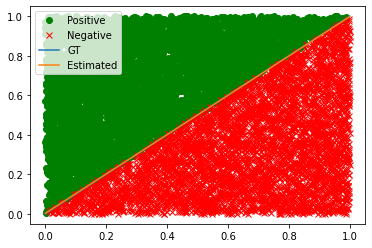

Qutting: Reached max iterations


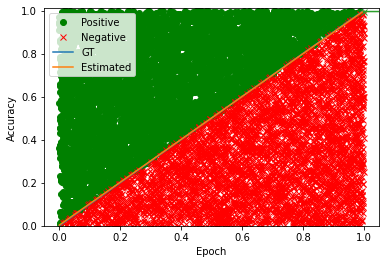

Samples - Epochs - Accuracy:  [[10, 100, 0.9], [40, 63, 1.0], [70, 5, 1.0], [100, 2, 1.0], [1000, 100, 0.997], [10000, 100, 0.9987]]


In [ ]:
epoch(plr, 10000)

In [ ]:
for i in range (len(plr.statistics)):
  print (plr.statistics[i])

[10, 100, 0.9]
[40, 63, 1.0]
[70, 5, 1.0]
[100, 2, 1.0]
[1000, 100, 0.997]
[10000, 100, 0.9987]


In [ ]:
mean = 0
l= len(p.statistics)
for i in range (l):
  mean = mean + p.statistics[i][1]
mean = mean / l


meanlr = 0
llr = len(plr.statistics)
for j in range (llr):
  meanlr = meanlr + plr.statistics[j][1]
meanlr = meanlr / llr

print ("Mean perceptron   : ",mean)
print ("\nSamples - Epochs - Accuracy: ")

for i in range (len(p.statistics)):
  print (p.statistics[i])

print ("\nMean perceptron with Learning Rate: ",meanlr)
print ("\nSamples - Epochs - Accuracy: ")
for i in range (len(plr.statistics)):
  print (plr.statistics[i])

Mean perceptron   :  39.666666666666664

Samples - Epochs - Accuracy: 
[10, 37, 1.0]
[40, 3, 1.0]
[70, 1, 1.0]
[100, 12, 1.0]
[1000, 85, 1.0]
[10000, 100, 0.9992]

Mean perceptron with Learning Rate:  61.666666666666664

Samples - Epochs - Accuracy: 
[10, 100, 0.9]
[40, 63, 1.0]
[70, 5, 1.0]
[100, 2, 1.0]
[1000, 100, 0.997]
[10000, 100, 0.9987]
